# ベンチマークとして線形回帰とSVMで予測する

In [1]:
import pandas as pd

fwalldata = pd.read_csv('../inputs/frontwallSensorValues.csv', dtype=int)
print(fwalldata.head())

   leftDia  rightDia  leftFront  rightFront  pulse
0      568       904        118         152      1
1      596       927        130         149      2
2      577       912        126         155      3
3      573       917        113         161      4
4      567       905        123         151      5


In [2]:
from utils import *

fwalldata['dist'] = pulse2distance(fwalldata['pulse'])
fwalldata = fwalldata.drop('pulse', axis=1)
fwalldata.head()

,leftDia,rightDia,leftFront,rightFront,dist
0,568,904,118,152,191.625
1,596,927,130,149,191.250
2,577,912,126,155,190.875
3,573,917,113,161,190.500
4,567,905,123,151,190.125


In [3]:
# Cross validation
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

trainattrs = ['leftDia', 'rightDia', 'leftFront', 'rightFront']

clf = linear_model.LinearRegression()
scores = cross_val_score(clf, fwalldata.loc[:, trainattrs], fwalldata.loc[:, 'dist'], cv=5)
print(scores)

[-21.94525598   0.48828635  -6.32398715  -7.24638257 -65.9958184 ]


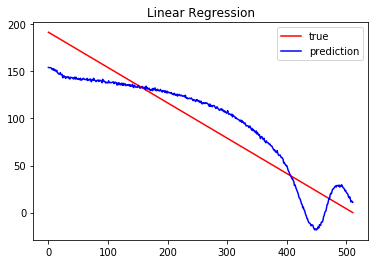

In [4]:
# fit, predict and plot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

testsize = 0.2
trainX, testX, trainY, testY = train_test_split(fwalldata.loc[:, trainattrs], fwalldata.loc[:, 'dist'], test_size=testsize)
clf.fit(trainX, trainY)

pred = clf.predict(fwalldata.loc[:, trainattrs])
plt.plot(range(fwalldata.shape[0]), fwalldata.loc[:, 'dist'], c='red', label='true')
plt.plot(range(fwalldata.shape[0]), pred, c='blue', label='prediction')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [10]:
from sklearn.svm import SVR

clf2 = SVR(kernel='rbf', C=1e3, gamma=0.1)
scores = cross_val_score(clf2, fwalldata.loc[:, trainattrs], fwalldata.loc[:, 'dist'], cv=5)
print(scores)

[-7.46342069e+01 -1.85355171e+01 -1.24002229e-04 -1.86824439e+01
 -7.49644446e+01]


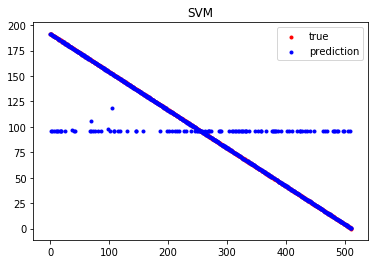

In [20]:
# fit and predict
clf2.fit(trainX, trainY)
pred = clf2.predict(fwalldata.loc[:, trainattrs])

# plot
plt.scatter(range(fwalldata.shape[0]), fwalldata['dist'], c='red', label='true', marker='.')
plt.scatter(range(fwalldata.shape[0]), pred, c='blue', label='prediction', marker='.')
plt.title('SVM')
plt.legend()
plt.show()